# PREDICTING ELECTRICITY PRICES FOR A SOLAR ENERGY COMPANY IN AUSTRALIA

Solarays Energy company builds solar panel arrays and then sells the energy they produce to industrial customers. The company wants to expand to the city of Melbourne in the state of Victoria. 

Prices and demand for electricity change every day. Customers pay for the energy received using a formula based on the local energy market's daily price.

The company's pricing committee wants to estimate energy prices for the next 12-18 months to use those prices as the basis for contract negotiations. Hence, they got in touch with a data scientist to help resolve and unravel this issues.


### Questions to meditate on


1. How do energy prices change throughout the year?
2. Are there any patterns by season or month of the year?
3. Build a forecast of daily energy prices the company can use as the basis of its financial planning.


##### The dataset consist of over five years of energy price and demand data between 2015-2020

In [307]:
import pandas as pd
data_df=pd.read_csv('complete_dataset.csv')

In [308]:
data_df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [309]:
data_df.shape

(2106, 14)

In [310]:
type(data_df)

pandas.core.frame.DataFrame

In [311]:
data_df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


# Extracting Data from the  Date column

The date column is very important in order to get insights or trends on the performance of the solar company prices and demands over the months or years

In [312]:
#lets check for the data type of the date column
data_df.dtypes

date                object
demand             float64
RRP                float64
demand_pos_RRP     float64
RRP_positive       float64
demand_neg_RRP     float64
RRP_negative       float64
frac_at_neg_RRP    float64
min_temperature    float64
max_temperature    float64
solar_exposure     float64
rainfall           float64
school_day          object
holiday             object
dtype: object

In [313]:
#we can see from above that the data type for the date is an object
#lets change the data type of the date from object to datetime
data_df['date']=pd.to_datetime(data_df['date'])
data_df.dtypes

date               datetime64[ns]
demand                    float64
RRP                       float64
demand_pos_RRP            float64
RRP_positive              float64
demand_neg_RRP            float64
RRP_negative              float64
frac_at_neg_RRP           float64
min_temperature           float64
max_temperature           float64
solar_exposure            float64
rainfall                  float64
school_day                 object
holiday                    object
dtype: object

In [314]:
#lets create new columns from the date column
data_df['month_name'] = data_df['date'].dt.month_name()
data_df['month'] = data_df['date'].dt.month
data_df['day_name'] = data_df['date'].dt.day_name()
data_df['day'] = data_df['date'].dt.weekday
data_df['year']= data_df['date'].dt.year
data_df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday,month_name,month,day_name,day,year
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y,January,1,Thursday,3,2015
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N,January,1,Friday,4,2015
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N,January,1,Saturday,5,2015
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N,January,1,Sunday,6,2015
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N,January,1,Monday,0,2015


In [315]:
data_df.dtypes

date               datetime64[ns]
demand                    float64
RRP                       float64
demand_pos_RRP            float64
RRP_positive              float64
demand_neg_RRP            float64
RRP_negative              float64
frac_at_neg_RRP           float64
min_temperature           float64
max_temperature           float64
solar_exposure            float64
rainfall                  float64
school_day                 object
holiday                    object
month_name                 object
month                       int64
day_name                   object
day                         int64
year                        int64
dtype: object

Since we hace extrated or broken down the date column into day, month and year, its time to drop or remove the date column.

In [316]:
data_df.drop(labels='date', axis=1, inplace=True)


In [317]:
data_df.head()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday,month_name,month,day_name,day,year
0,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y,January,1,Thursday,3,2015
1,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N,January,1,Friday,4,2015
2,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N,January,1,Saturday,5,2015
3,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N,January,1,Sunday,6,2015
4,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N,January,1,Monday,0,2015


# Data Visualization

In [318]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

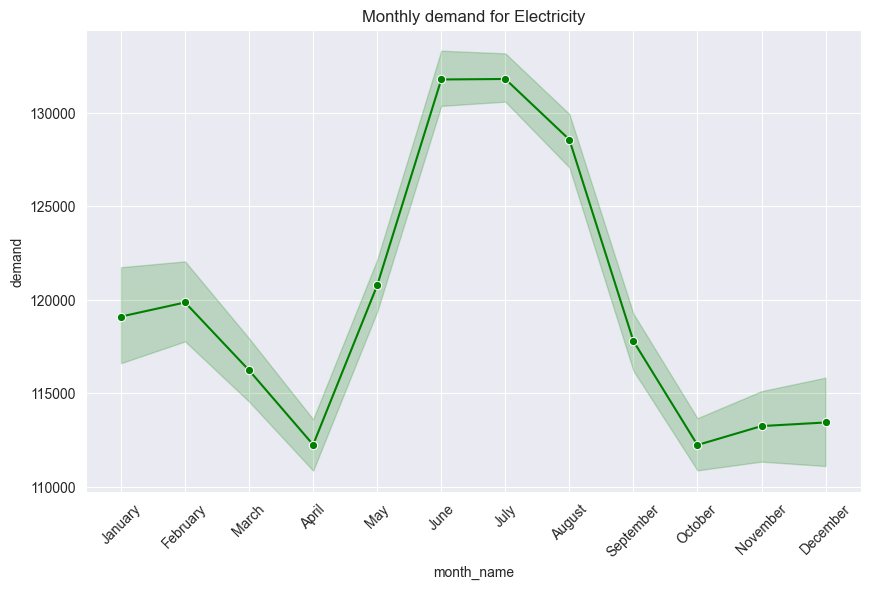

In [319]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data_df,x='month_name',y='demand', marker='o',color='green')
plt.title('Monthly demand for Electricity')
plt.grid()
sns.set_style('dark')
plt.xticks(rotation=45)


There is always a higher demand for electricity for the month of April, May, June, July. This means that solarays would be making a lot of money during this period because of the high demand of electricity aa customers would be paying more. But what could be the reason for these high demand? 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

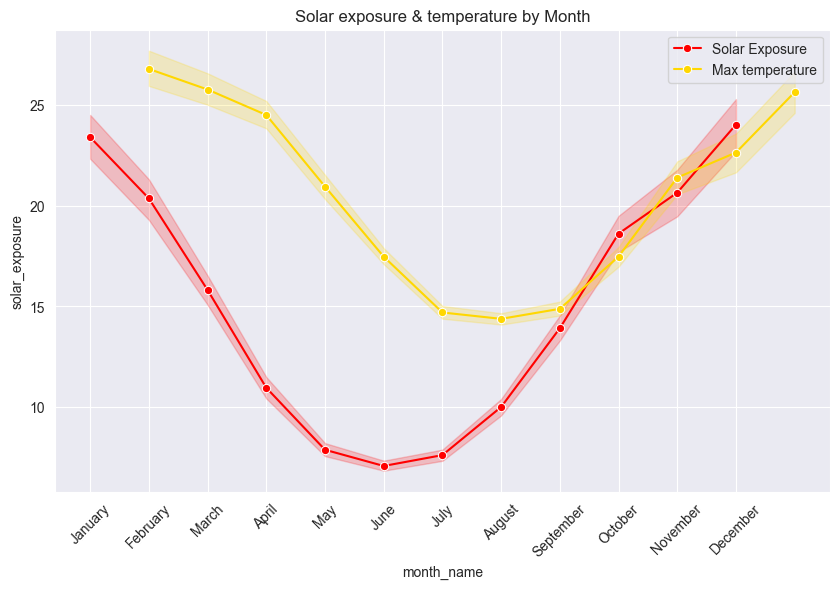

In [320]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data_df,x='month_name',y='solar_exposure', marker='o',color='red',label='Solar Exposure')
sns.lineplot(data=data_df,x='month',y='max_temperature', marker='o',color='gold',label='Max temperature')
plt.title('Solar exposure & temperature by Month')
plt.grid()
sns.set_style('dark')
plt.xticks(rotation=45)


The trend above shows that solar exposure and temperature tends to fall from january all through to july and starts increasing again from August to january. But it seems the months of may, june and july experience the lowest so far. This best explains the reason why the electricity demand was high during the months of may, june and july in initial lineplot above because of drop in solar exposure . 

Lets further confirm  if there are any correlation between solar exposure and max temperature using the regplot.

<AxesSubplot: xlabel='max_temperature', ylabel='solar_exposure'>

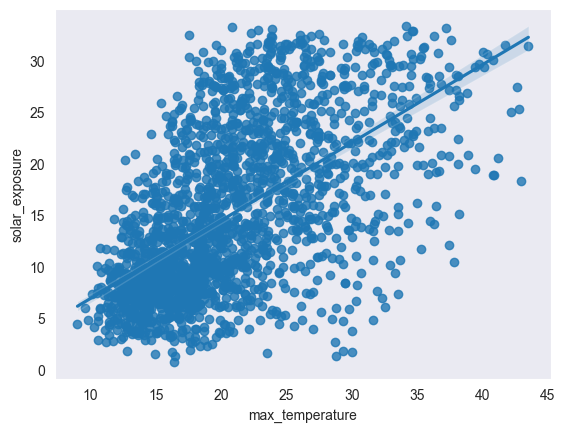

In [321]:
sns.regplot(x=data_df['max_temperature'], y=data_df['solar_exposure'])

The plot aboves together with the trend line confirms that solar exposure and max temperature are positively correlated. So this means that as solar exposure decreases, temperature also decreases and vice versa.

lets visualize the quality of categorical data present in the school day and holiday columns and we would decide which to keep or drop.

C:\Users\Digital Media\AppData\Local\Temp\ipykernel_29900\2411650752.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data_df.corr(), vmax=1, square=True,annot=True,cmap='viridis')


Text(0.5, 1.0, 'Correlation between Different Features')

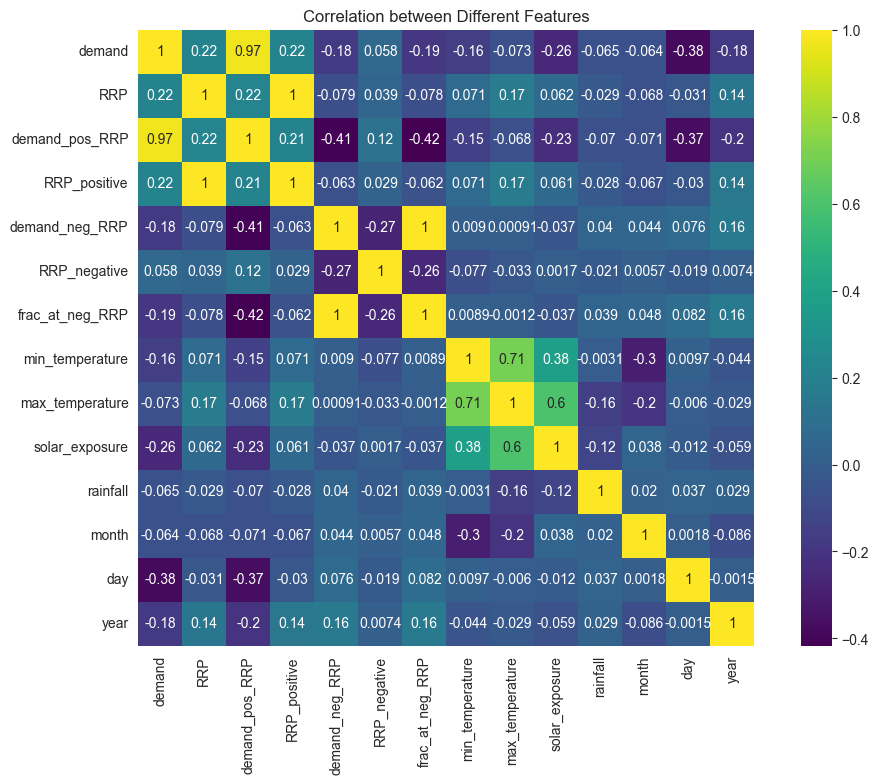

In [322]:
plt.figure(figsize=(12,8))
sns.heatmap(data=data_df.corr(), vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between Different Features')

<AxesSubplot: xlabel='school_day', ylabel='count'>

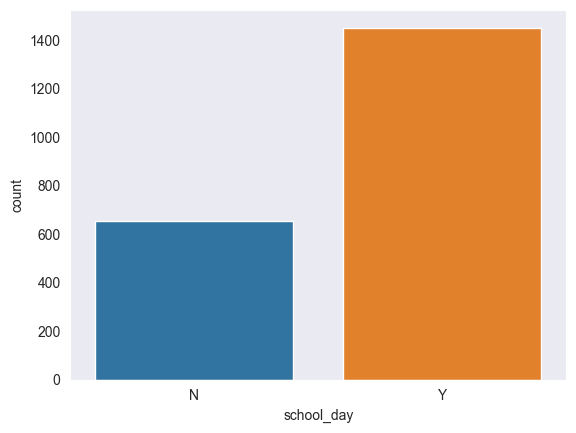

In [323]:
sns.countplot(x='school_day',data=data_df)

The column 

<AxesSubplot: xlabel='holiday', ylabel='count'>

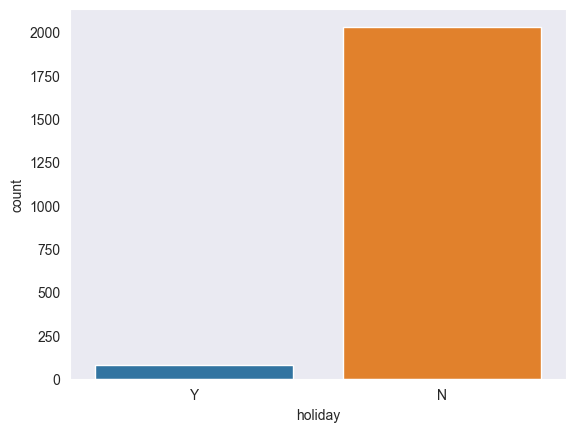

In [324]:
sns.countplot(x='holiday',data=data_df)

The holiday column is very much biased, as it only contains 1 categorical variable. Keeping this column could affect our result when training the data. Hence we would have to drop it.

In [325]:
#lets remove the holiday column
data_df.drop(labels='holiday',axis=1,inplace=True)
data_df.head()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month_name,month,day_name,day,year
0,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,January,1,Thursday,3,2015
1,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,January,1,Friday,4,2015
2,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,January,1,Saturday,5,2015
3,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,January,1,Sunday,6,2015
4,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,January,1,Monday,0,2015


<AxesSubplot: xlabel='demand', ylabel='Count'>

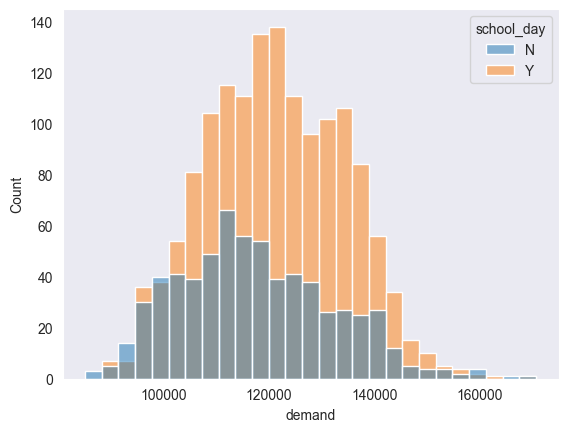

In [326]:
sns.histplot(x=data_df['demand'] ,hue=data_df['school_day'])

The histogram shows that the electricity demand is always high whenever there is school day and electricty demand tends to be low when there is no school day. But how can this affect the prices of eletcricity?

<AxesSubplot: xlabel='school_day', ylabel='demand'>

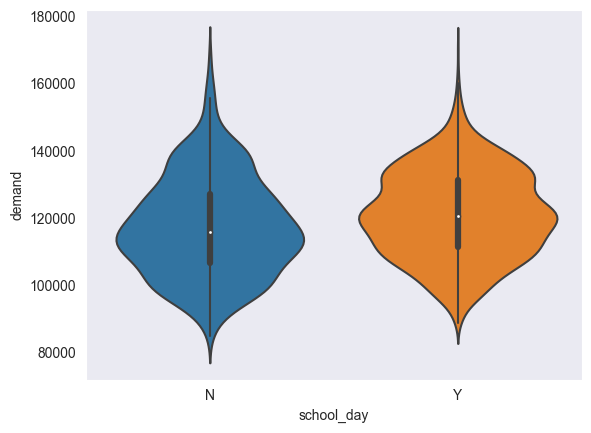

In [327]:
sns.violinplot(x=data_df['school_day'],y=data_df['demand'])

In [328]:
data_df.head()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month_name,month,day_name,day,year
0,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,January,1,Thursday,3,2015
1,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,January,1,Friday,4,2015
2,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,January,1,Saturday,5,2015
3,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,January,1,Sunday,6,2015
4,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,January,1,Monday,0,2015


# Outliers

Outliers are extreme values that are outside the range of what is expected and can sometimes skew the distribution of the data. Lets visualize the distribution of each features.

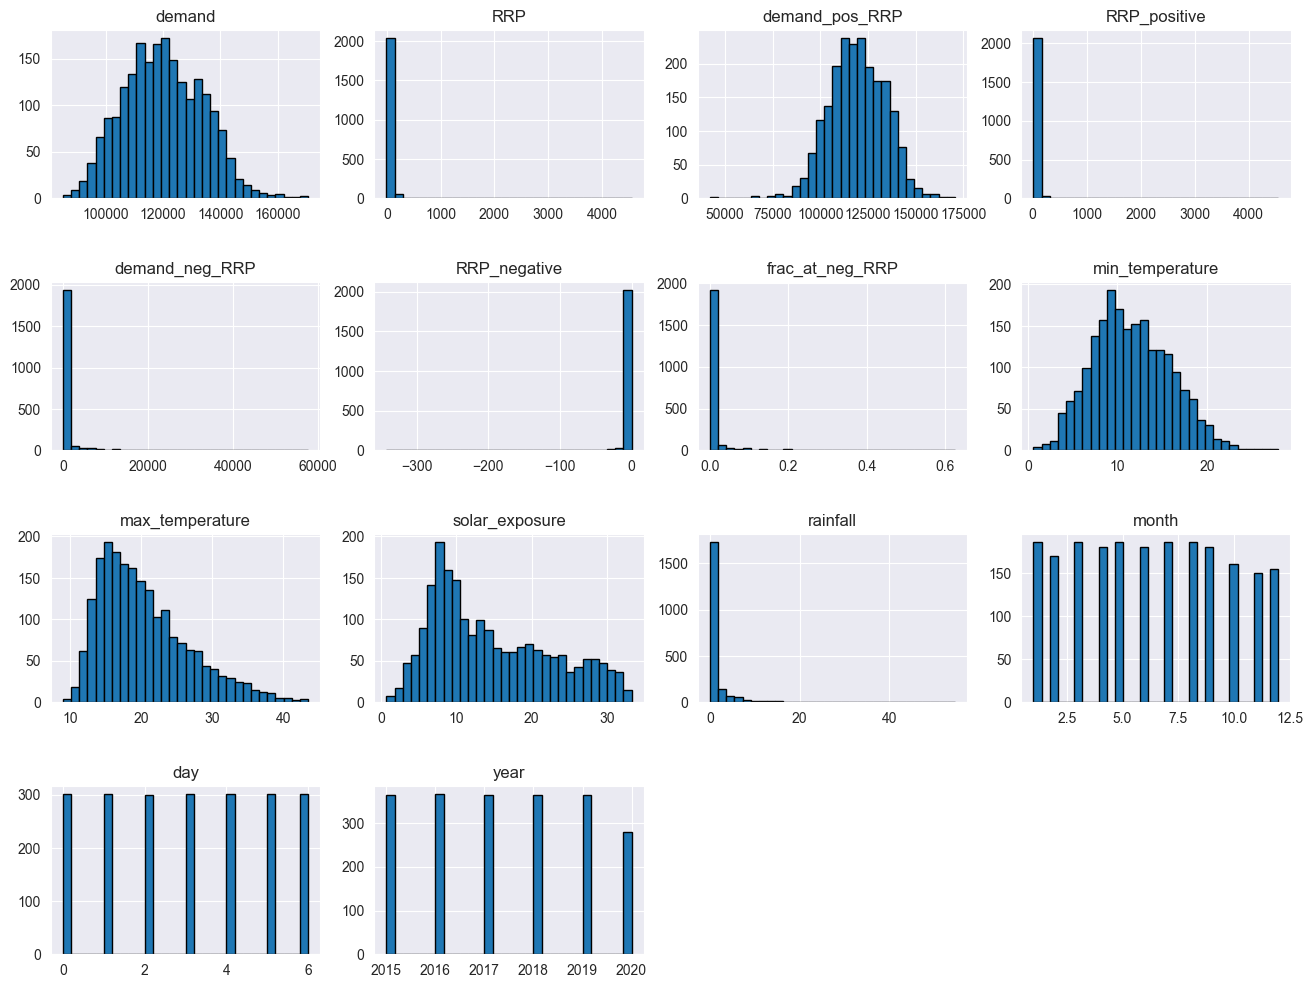

In [329]:
data_df.hist(figsize=(16, 12), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.2)

Features like demand, demand_pos_RRP, min_temeperature, max_temperature, solar_exposure are Evenly Distributed because they tend to have a bell shaped curved. While the rest of the features or columns described by the histogram above are not well distributed and they looked skewed, this could be as a result of the presence of outliers.

In [330]:
#lets seperate the columns or features containing outliers
outliers_of_interest = ['RRP','RRP_positive','demand_neg_RRP','RRP_negative','frac_at_neg_RRP','rainfall']

In [331]:
data_df[outliers_of_interest].describe()

,RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2103.000000
mean,76.079554,76.553847,783.171448,-2.686052,0.008547,1.505944
std,130.246805,130.114184,3578.920686,19.485432,0.039963,4.307897
min,-6.076028,13.568986,0.000000,-342.220000,0.000000,0.000000
25%,38.707040,39.117361,0.000000,0.000000,0.000000,0.000000
50%,66.596738,66.869058,0.000000,0.000000,0.000000,0.000000
75%,95.075012,95.130181,0.000000,0.000000,0.000000,0.800000
max,4549.645105,4549.645105,57597.595000,0.000000,0.625000,54.600000


When there is a big gap or noticeable difference between the max and the 75th percentile, it is another evidence that the features contain outliers. Lets check for outliers in the features using boxplot in the seaborn library.

Text(0.5, 1.0, 'Rainfall')

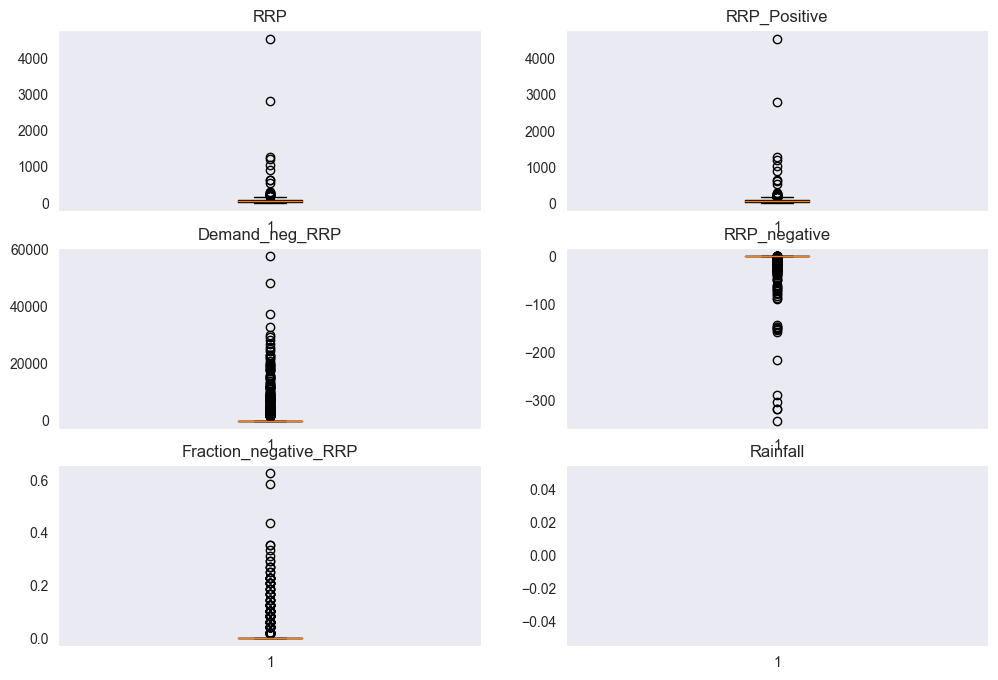

In [332]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3,2,figsize=(12,8))

axis[0, 0].boxplot(x=data_df['RRP'])
axis[0, 0].set_title("RRP")

axis[0, 1].boxplot(x=data_df['RRP_positive'])
axis[0, 1].set_title("RRP_Positive")

axis[1, 0].boxplot(x=data_df['demand_neg_RRP'])
axis[1, 0].set_title("Demand_neg_RRP")

axis[1, 1].boxplot(x=data_df['RRP_negative'])
axis[1, 1].set_title("RRP_negative")

axis[2, 0].boxplot(x=data_df['frac_at_neg_RRP'])
axis[2, 0].set_title("Fraction_negative_RRP")

axis[2, 1].boxplot(x=data_df['rainfall'])
axis[2, 1].set_title("Rainfall")

The visualization reaffirms that there are outliers present in those features. The dots dispalying are the extreme values that need to be removed.

# Using Interquatile Rule to remove outliers

To find the outliers in a variable, we need to find the distribution boundaries according to the IQR proximity rule.

In [333]:
def find_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [334]:
#removing outliers across multiple variables
RRP_upper_limit, RRP_lower_limit = find_boundaries(data_df, 'RRP', 1.5)
RRP_P_upper_limit, RRP_P_lower_limit = find_boundaries(data_df, 'RRP_positive', 1.5)
demand_np_upper_limit, demand_np_lower_limit = find_boundaries(data_df, 'demand_neg_RRP', 1.5)
RRP_n_upper_limit, RRP_n_lower_limit = find_boundaries(data_df, 'RRP_negative', 1.5)
fanp_upper_limit, fanp_lower_limit = find_boundaries(data_df, 'frac_at_neg_RRP', 1.5)
rainfall_upper_limit, rainfall_lower_limit = find_boundaries(data_df, 'rainfall', 1.5)

In [335]:
import numpy as np
outliers_RRP = np.where(data_df['RRP'] > RRP_upper_limit, True,
              np.where(data_df['RRP'] < RRP_lower_limit, True, False))

outliers_RRP_P = np.where(data_df['RRP_positive'] > RRP_P_upper_limit, True,
                 np.where(data_df['RRP_positive'] < RRP_P_lower_limit, True, 
                 False))


outliers_demand_np = np.where(data_df['demand_neg_RRP'] > demand_np_upper_limit, True,
                 np.where(data_df['demand_neg_RRP'] < demand_np_lower_limit, True, 
                 False))



outliers_RRP_n = np.where(data_df['RRP_negative'] > RRP_n_upper_limit, True,
                 np.where(data_df['RRP_negative'] < RRP_n_lower_limit, True, 
                 False))



outliers_fanp = np.where(data_df['frac_at_neg_RRP'] > fanp_upper_limit, True,
                np.where(data_df['frac_at_neg_RRP'] < fanp_lower_limit, True, 
                False))


outliers_rainfall = np.where(data_df['rainfall'] > rainfall_upper_limit, True,
                 np.where(data_df['rainfall'] < rainfall_lower_limit, True, 
                 False))


In [336]:
#Finally, let's remove the observations with outliers in any of the variables:
data_trimmed = data_df.loc[~(outliers_RRP + outliers_RRP_P + outliers_demand_np + outliers_RRP_n + outliers_fanp + outliers_rainfall)]

Text(0.5, 1.0, 'Rainfall')

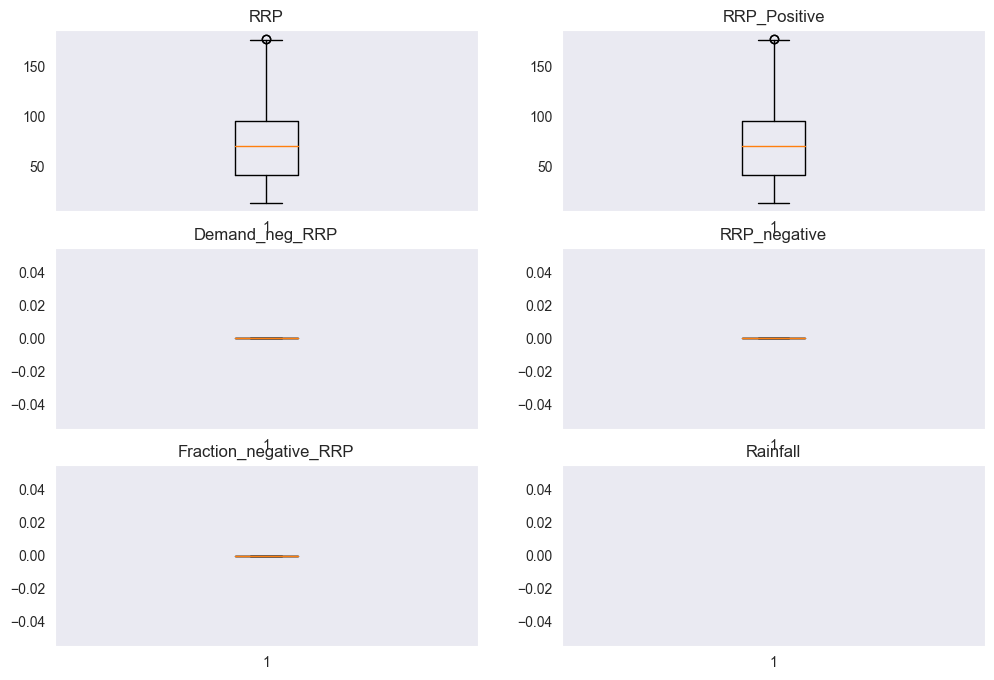

In [337]:
# visualize the columns to check if outliers still exists
figure, axis = plt.subplots(3,2,figsize=(12,8))

axis[0, 0].boxplot(x=data_trimmed['RRP'])
axis[0, 0].set_title("RRP")

axis[0, 1].boxplot(x=data_trimmed['RRP_positive'])
axis[0, 1].set_title("RRP_Positive")

axis[1, 0].boxplot(x=data_trimmed['demand_neg_RRP'])
axis[1, 0].set_title("Demand_neg_RRP")

axis[1, 1].boxplot(x=data_trimmed['RRP_negative'])
axis[1, 1].set_title("RRP_negative")

axis[2, 0].boxplot(x=data_trimmed['frac_at_neg_RRP'])
axis[2, 0].set_title("Fraction_negative_RRP")

axis[2, 1].boxplot(x=data_trimmed['rainfall'])
axis[2, 1].set_title("Rainfall")

<AxesSubplot: ylabel='rainfall'>

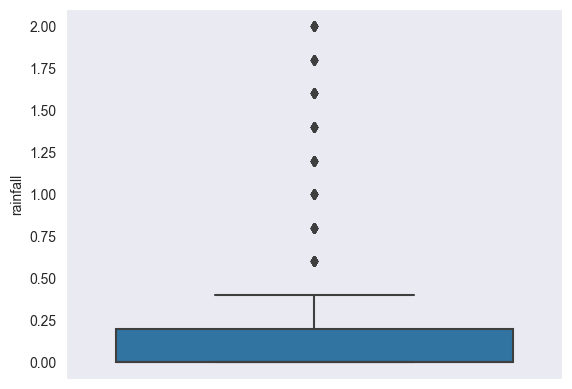

In [338]:
sns.boxplot(y=data_trimmed['rainfall'])

In [339]:
data_trimmed[outliers_of_interest].describe()

,RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,rainfall
count,1580.000000,1580.000000,1580.0,1580.0,1580.0,1577.000000
mean,71.502987,71.502987,0.0,0.0,0.0,0.217882
std,33.881762,33.881762,0.0,0.0,0.0,0.468402
min,13.568986,13.568986,0.0,0.0,0.0,0.000000
25%,41.477395,41.477395,0.0,0.0,0.0,0.000000
50%,71.115834,71.115834,0.0,0.0,0.0,0.000000
75%,95.998315,95.998315,0.0,0.0,0.0,0.200000
max,178.079675,178.079675,0.0,0.0,0.0,2.000000


We can see that the difference between the max and the 75th percentile is very close, thus is another evidence that outliers are no longer present in the features

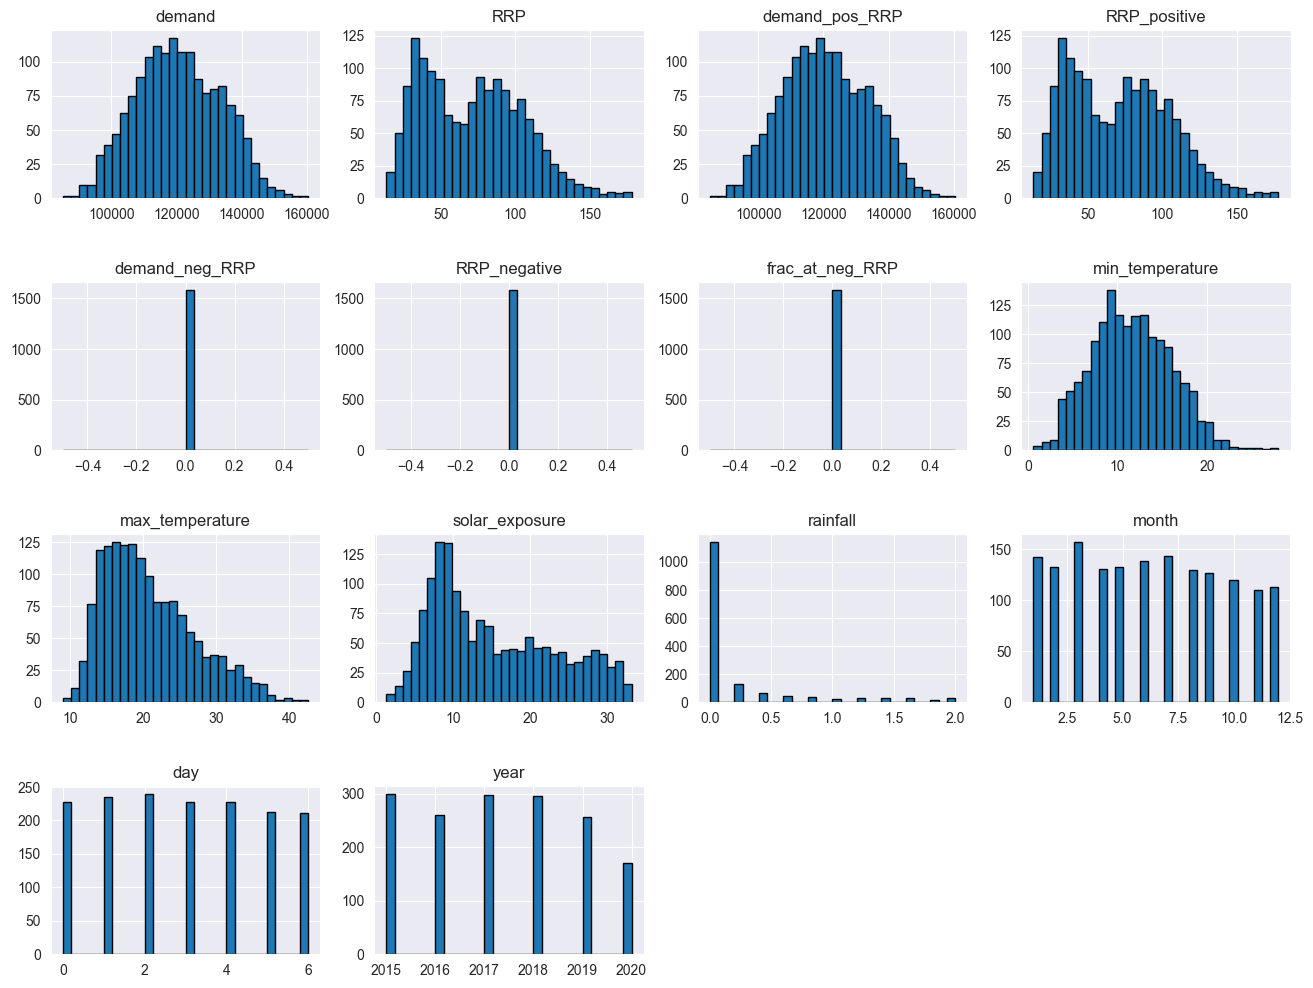

In [340]:
#lets check for the distribution once again
data_trimmed.hist(figsize=(16, 12), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.2)

# Checking for missing values and Replacing categorical variables

In [341]:
list(data_trimmed.columns)

['demand',
 'RRP',
 'demand_pos_RRP',
 'RRP_positive',
 'demand_neg_RRP',
 'RRP_negative',
 'frac_at_neg_RRP',
 'min_temperature',
 'max_temperature',
 'solar_exposure',
 'rainfall',
 'school_day',
 'month_name',
 'month',
 'day_name',
 'day',
 'year']

In [342]:
data_trimmed['school_day'].replace({'N': 0, 'Y': 1}, inplace = True)
data_trimmed.head()

C:\Users\Digital Media\AppData\Local\Temp\ipykernel_29900\2712070079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trimmed['school_day'].replace({'N': 0, 'Y': 1}, inplace = True)


,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month_name,month,day_name,day,year
2,142300.540,34.564855,142300.540,34.564855,0.0,0.0,0.0,20.0,38.2,26.5,0.0,0,January,1,Saturday,5,2015
4,118132.200,26.724176,118132.200,26.724176,0.0,0.0,0.0,15.0,22.0,30.7,0.0,0,January,1,Monday,0,2015
5,130672.485,31.282311,130672.485,31.282311,0.0,0.0,0.0,17.7,26.0,31.6,0.0,0,January,1,Tuesday,1,2015
8,121801.155,34.490675,121801.155,34.490675,0.0,0.0,0.0,16.5,18.0,3.1,1.2,0,January,1,Friday,4,2015
10,99865.755,18.234768,99865.755,18.234768,0.0,0.0,0.0,15.6,27.5,29.9,0.0,0,January,1,Sunday,6,2015


In [343]:
data_trimmed['school_day'].unique()

array([0, 1], dtype=int64)

In [344]:
# We need to get rid of the month_name and day_name since we are no longer needing it for visualization
data_trimmed.drop(labels=['month_name', 'day_name'], axis=1, inplace=True)

C:\Users\Digital Media\AppData\Local\Temp\ipykernel_29900\2050433331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trimmed.drop(labels=['month_name', 'day_name'], axis=1, inplace=True)


In [345]:
data_trimmed.head()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month,day,year
2,142300.540,34.564855,142300.540,34.564855,0.0,0.0,0.0,20.0,38.2,26.5,0.0,0,1,5,2015
4,118132.200,26.724176,118132.200,26.724176,0.0,0.0,0.0,15.0,22.0,30.7,0.0,0,1,0,2015
5,130672.485,31.282311,130672.485,31.282311,0.0,0.0,0.0,17.7,26.0,31.6,0.0,0,1,1,2015
8,121801.155,34.490675,121801.155,34.490675,0.0,0.0,0.0,16.5,18.0,3.1,1.2,0,1,4,2015
10,99865.755,18.234768,99865.755,18.234768,0.0,0.0,0.0,15.6,27.5,29.9,0.0,0,1,6,2015


In [346]:
data_trimmed.isnull().sum().sort_values(ascending=True)

demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
school_day         0
month              0
day                0
year               0
rainfall           3
dtype: int64

In [347]:
data_trimmed=data_trimmed.dropna(how='any')
data_trimmed.head()


,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month,day,year
2,142300.540,34.564855,142300.540,34.564855,0.0,0.0,0.0,20.0,38.2,26.5,0.0,0,1,5,2015
4,118132.200,26.724176,118132.200,26.724176,0.0,0.0,0.0,15.0,22.0,30.7,0.0,0,1,0,2015
5,130672.485,31.282311,130672.485,31.282311,0.0,0.0,0.0,17.7,26.0,31.6,0.0,0,1,1,2015
8,121801.155,34.490675,121801.155,34.490675,0.0,0.0,0.0,16.5,18.0,3.1,1.2,0,1,4,2015
10,99865.755,18.234768,99865.755,18.234768,0.0,0.0,0.0,15.6,27.5,29.9,0.0,0,1,6,2015


In [348]:
data_trimmed.reset_index(drop=True)

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month,day,year
0,142300.540,34.564855,142300.540,34.564855,0.0,0.0,0.0,20.0,38.2,26.5,0.0,0,1,5,2015
1,118132.200,26.724176,118132.200,26.724176,0.0,0.0,0.0,15.0,22.0,30.7,0.0,0,1,0,2015
2,130672.485,31.282311,130672.485,31.282311,0.0,0.0,0.0,17.7,26.0,31.6,0.0,0,1,1,2015
3,121801.155,34.490675,121801.155,34.490675,0.0,0.0,0.0,16.5,18.0,3.1,1.2,0,1,4,2015
4,99865.755,18.234768,99865.755,18.234768,0.0,0.0,0.0,15.6,27.5,29.9,0.0,0,1,6,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,115643.440,34.696676,115643.440,34.696676,0.0,0.0,0.0,11.8,15.5,9.4,0.8,0,9,3,2020
1573,112335.700,40.837043,112335.700,40.837043,0.0,0.0,0.0,8.4,18.7,13.6,0.0,0,9,4,2020
1574,117535.715,51.779356,117535.715,51.779356,0.0,0.0,0.0,8.2,15.0,13.9,1.6,0,9,3,2020
1575,114651.140,59.746053,114651.140,59.746053,0.0,0.0,0.0,6.5,13.6,18.3,0.0,0,9,0,2020


In [349]:
data_trimmed.isnull().sum().sort_values(ascending=True)

demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
month              0
day                0
year               0
dtype: int64

# Splitting our data into train and test

In [350]:
#lets filter the columns 
features_x=['demand','demand_pos_RRP','RRP_positive','demand_neg_RRP','RRP_negative','frac_at_neg_RRP','min_temperature','max_temperature','solar_exposure','rainfall','school_day','month','day','year']
X=data_trimmed[features_x]
X.head()

,demand,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month,day,year
2,142300.540,142300.540,34.564855,0.0,0.0,0.0,20.0,38.2,26.5,0.0,0,1,5,2015
4,118132.200,118132.200,26.724176,0.0,0.0,0.0,15.0,22.0,30.7,0.0,0,1,0,2015
5,130672.485,130672.485,31.282311,0.0,0.0,0.0,17.7,26.0,31.6,0.0,0,1,1,2015
8,121801.155,121801.155,34.490675,0.0,0.0,0.0,16.5,18.0,3.1,1.2,0,1,4,2015
10,99865.755,99865.755,18.234768,0.0,0.0,0.0,15.6,27.5,29.9,0.0,0,1,6,2015


In [351]:
#lets filter the target (the price)
y=data_trimmed.RRP
y.head()

2     34.564855
4     26.724176
5     31.282311
8     34.490675
10    18.234768
Name: RRP, dtype: float64

In [352]:
#its time to split our data into for training and testing
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state =0)

In [353]:
train_X.head()

,demand,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month,day,year
199,131141.355,131141.355,43.573422,0.0,0.0,0.0,0.6,12.1,9.7,0.0,1,7,6,2015
743,111341.675,111341.675,70.012195,0.0,0.0,0.0,17.5,28.8,1.3,1.4,0,1,4,2017
381,114097.070,114097.070,29.153262,0.0,0.0,0.0,14.9,32.7,31.5,0.0,0,1,6,2016
15,116690.765,116690.765,23.015191,0.0,0.0,0.0,13.1,27.3,30.3,0.0,0,1,4,2015
1079,120821.055,120821.055,105.435860,0.0,0.0,0.0,14.1,26.4,32.1,0.0,1,12,4,2017


In [354]:
train_y.head()

199      43.573422
743      70.012195
381      29.153262
15       23.015191
1079    105.435860
Name: RRP, dtype: float64

# Feature Selection

In [355]:
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.ensemble import RandomForestRegressor #Random Forest for Feature Selection

In [356]:
model = RandomForestRegressor(n_estimators = 100,max_depth=10) 
#n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions.

rfe = RFE(model, n_features_to_select = 10)

In [357]:
fit_ = rfe.fit(train_X,train_y)

In [358]:
feature_rank = pd.DataFrame({"Features" : X.columns,
                             "Selected" : fit_.support_,
                             "Feature Rank" : fit_.ranking_})

feature_rank = feature_rank.sort_values(by="Feature Rank")

feature_rank

,Features,Selected,Feature Rank
0,demand,True,1
1,demand_pos_RRP,True,1
2,RRP_positive,True,1
6,min_temperature,True,1
7,max_temperature,True,1
8,solar_exposure,True,1
10,school_day,True,1
11,month,True,1
12,day,True,1
13,year,True,1


In [359]:
#View the Selected Features
selected_feature_names = feature_rank.loc[feature_rank["Selected"] == True]
selected_feature_names

,Features,Selected,Feature Rank
0,demand,True,1
1,demand_pos_RRP,True,1
2,RRP_positive,True,1
6,min_temperature,True,1
7,max_temperature,True,1
8,solar_exposure,True,1
10,school_day,True,1
11,month,True,1
12,day,True,1
13,year,True,1


In [360]:
#since we now know the top 10 most important faetures, lets filter and extract the features 
list(train_X.columns)

['demand',
 'demand_pos_RRP',
 'RRP_positive',
 'demand_neg_RRP',
 'RRP_negative',
 'frac_at_neg_RRP',
 'min_temperature',
 'max_temperature',
 'solar_exposure',
 'rainfall',
 'school_day',
 'month',
 'day',
 'year']

In [361]:
features_of_importance=['demand','demand_pos_RRP','RRP_positive','min_temperature','max_temperature','solar_exposure','rainfall','school_day','month','day']

In [362]:
train_X=train_X[features_of_importance]
test_X=test_X[features_of_importance]

# Features Scaling

Many machine learning algorithms are sensitive to the scale and magnitude of the features.Thus, having features within a similar scale allows us to compare feature importance, and also helps algorithms converge faster, thus improving performance and training times. 

Standardization is the process of centering the variable at zero and standardizing the variance to 1. To standardize features, we subtract the mean from each observation and then divide the result by the standard deviation.

In [363]:
from sklearn.preprocessing import StandardScaler 

In [364]:
#Next, we'll set up a standard scaler transformer using StandardScaler() 
#from scikit-learn and fit it to the train set so that it learns each 
#variable's mean and standard deviation:
scaler = StandardScaler() #uses the mean and standard deviation
scaler.fit(train_X)

StandardScaler()

In [365]:
#Now, let's standardize the train and test sets with the trained scaler; 
#that is, we'll remove the variable's mean from each observation 
#and divide the result by the standard deviation:
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [366]:
train_X_scaled

array([[ 0.82738357,  0.82738357, -0.82672746, ...,  0.66612107,
         0.21054642,  1.55613033],
       [-0.70203085, -0.70203085, -0.04506656, ..., -1.5012286 ,
        -1.56674464,  0.53779052],
       [-0.48919201, -0.48919201, -1.25305875, ..., -1.5012286 ,
        -1.56674464,  1.55613033],
       ...,
       [-1.25161279, -1.25161279,  0.77818138, ...,  0.66612107,
        -0.97431429,  1.55613033],
       [-2.62033413, -2.62033413, -1.20973306, ..., -1.5012286 ,
        -1.56674464, -1.49888911],
       [ 0.96148719,  0.96148719,  0.87499705, ...,  0.66612107,
        -0.08566876, -1.49888911]])

Whenever we standardize our data, it usually converts its to a numpy array. So we need to convert it back to a dataframe.

In [367]:
#Put the Numpy Array into Pandas Dataframe
train_X_scaled= pd.DataFrame(train_X_scaled, columns=['demand','demand_pos_RRP','RRP_positive','min_temperature','max_temperature','solar_exposure','rainfall','school_day','month','day'])

In [368]:
#Put the Numpy Array into Pandas Dataframe
test_X_scaled= pd.DataFrame(test_X_scaled, columns=['demand','demand_pos_RRP','RRP_positive','min_temperature','max_temperature','solar_exposure','rainfall','school_day','month','day'])

In [369]:
#lets confirm the if it has been converted to a dataframe
train_X_scaled.head()

,demand,demand_pos_RRP,RRP_positive,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month,day
0,0.827384,0.827384,-0.826727,-2.502557,-1.405231,-0.678090,-0.462458,0.666121,0.210546,1.556130
1,-0.702031,-0.702031,-0.045067,1.368057,1.285633,-1.723646,2.528028,-1.501229,-1.566745,0.537791
2,-0.489192,-0.489192,-1.253059,0.772578,1.914038,2.035377,-0.462458,-1.501229,-1.566745,1.556130
3,-0.288844,-0.288844,-1.434530,0.360323,1.043938,1.886012,-0.462458,-1.501229,-1.566745,0.537791
4,0.030198,0.030198,1.002232,0.589354,0.898922,2.110059,-0.462458,0.666121,1.691622,0.537791


Text(0.5, 1.0, 'Correlation between Different Fearures')

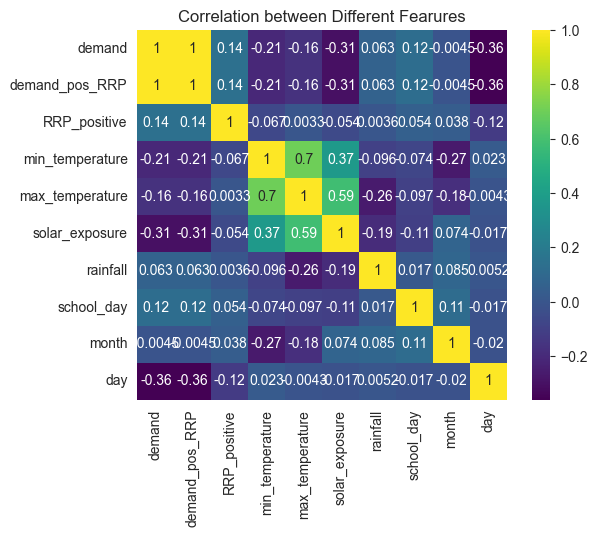

In [370]:
sns.heatmap(data=train_X_scaled.corr(), vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between Different Fearures')

# Using Machine learning (Linear Regression) to predict electricity price. 

In [371]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [372]:
reg_model= LinearRegression()

In [373]:
reg_model.fit(train_X,train_y)

LinearRegression()

In [374]:
y_pred = reg_model.predict(test_X)

In [375]:
print(mean_absolute_error(test_y, y_pred))

4.484074059086435e-11


The lower the MAE, the more 

In [376]:
print(r2_score(test_y, y_pred))

1.0


The R2 score of 1 indicates that the regression predictions perfectly fit the data.